In [2]:
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import folium

In [12]:
def get_api_data(api_url:str):
    response = requests.get(api_url)
    if response.status_code == 200:
        return response.json()
    
    return None


def get_city_geolocation(city_name:str):
  api_key = "d1af9eb638a7a24e06f0889f9e2c6a0d"
  api_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city_name},Piaui,BR&appid=d1af9eb638a7a24e06f0889f9e2c6a0d"

  data = get_api_data(api_url)

  return {"latitude": data[0]['lat'], "longitude": data[0]['lon']}


def load_file_data(dataset_path:str, dataset_name:str):
    csv_path = os.path.join(dataset_path, dataset_name)
    return pd.read_csv(csv_path)

def filter_data(database):

    city = []
    confirmed = []
    deaths = []
    population = []
    death_rate = []
    latitude = []
    longitude = []
    
    for data in database.values:
        if data[0] == "2022-03-26" and data[1] == "PI" and data[3] == "city":
            geolocation = get_city_geolocation(data[2])

            print(f"{data[2]}({data[1]}) - confirmed:{data[4]}, deaths:{data[5]}, population:{data[7]}, death_hate: {data[10]}, lat: {geolocation['latitude']}, lon: {geolocation['longitude']}")

            city.append(data[2])
            confirmed.append(data[4])
            deaths.append(data[5])
            population.append(data[7])
            death_rate.append(data[10])
            latitude.append(geolocation['latitude'])
            longitude.append(geolocation['longitude'])

    return pd.DataFrame({
        "city": city,
        "confirmed": confirmed,
        "deaths": deaths,
        "population": population, 
        "death_hate": death_rate, 
        "latitude": latitude, 
        "longitude": longitude
    })

In [13]:
covid_database = load_file_data("/home/jcsf/Dev/Sistemas Inteligentes/Atividade Visualização de casos de COVID-19 no Piauí", "covid19database.csv")

covid_filtered_data = filter_data(covid_database)

Acauã(PI) - confirmed:228, deaths:2, population:7102.0, death_hate: 0.0088, lat: -8.219542, lon: -41.083059
Agricolândia(PI) - confirmed:829, deaths:10, population:5131.0, death_hate: 0.0121, lat: -5.7967843, lon: -42.6605131
Água Branca(PI) - confirmed:1702, deaths:77, population:17470.0, death_hate: 0.0452, lat: -5.8913922, lon: -42.6361148
Alagoinha do Piauí(PI) - confirmed:402, deaths:13, population:7665.0, death_hate: 0.0323, lat: -7.0090952, lon: -40.939675
Alegrete do Piauí(PI) - confirmed:553, deaths:9, population:4918.0, death_hate: 0.0163, lat: -7.2440138, lon: -40.8602296
Alto Longá(PI) - confirmed:858, deaths:15, population:14339.0, death_hate: 0.0175, lat: -5.2549051, lon: -42.2072388
Altos(PI) - confirmed:5568, deaths:107, population:40605.0, death_hate: 0.0192, lat: -5.0393915, lon: -42.4611694
Alvorada do Gurguéia(PI) - confirmed:709, deaths:14, population:5445.0, death_hate: 0.0197, lat: -8.4465288, lon: -43.8655915
Amarante(PI) - confirmed:1736, deaths:36, population:

In [14]:
cities = covid_filtered_data[
    [
        "city",
        "population",
        "confirmed",
        "deaths",
        "latitude",
        "longitude"
    ]
]

map = folium.Map(
    location=[-7.092379770410439, -41.45441130138786], 
    zoom_start=6.4, 
    control_scale=False)

for index, location_info in cities.iterrows():
    
    confirmed = str(location_info["confirmed"])
    deaths = str(location_info["deaths"]) 
    population = str(location_info["population"])
    city = str(location_info["city"])

    html_view = folium.IFrame(
        '💀 mortes: ' + deaths + '<br>' + 
        '👥 população: ' + population   
    )

    Popup = folium.Popup(html_view, min_width=200, max_width=500)

    #custon_icon = folium.features.CustomIcon("https://www.iconfinder.com/icons/7847522/download/png/512", icon_size=(18, 18))

    text_icon = folium.DivIcon(
        icon_size=(250,36),
        icon_anchor=(0,0),
        html=f'<div style="font-size: 10pt; color: black; font-weight: bold"> <img style="height: 12px; width: 12px" src="https://www.iconfinder.com/icons/7847522/download/png/512"> {confirmed}</div>',
        )

    folium.Marker(
        [location_info["latitude"], location_info["longitude"]], 
        popup = Popup,
        tooltip= city,
        icon=text_icon
    ).add_to(map)


map

In [15]:
covid_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        224 non-null    object 
 1   confirmed   224 non-null    int64  
 2   deaths      224 non-null    int64  
 3   population  224 non-null    float64
 4   death_hate  224 non-null    float64
 5   latitude    224 non-null    float64
 6   longitude   224 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 12.4+ KB


array([[<AxesSubplot:title={'center':'confirmed'}>,
        <AxesSubplot:title={'center':'deaths'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'death_hate'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>]], dtype=object)

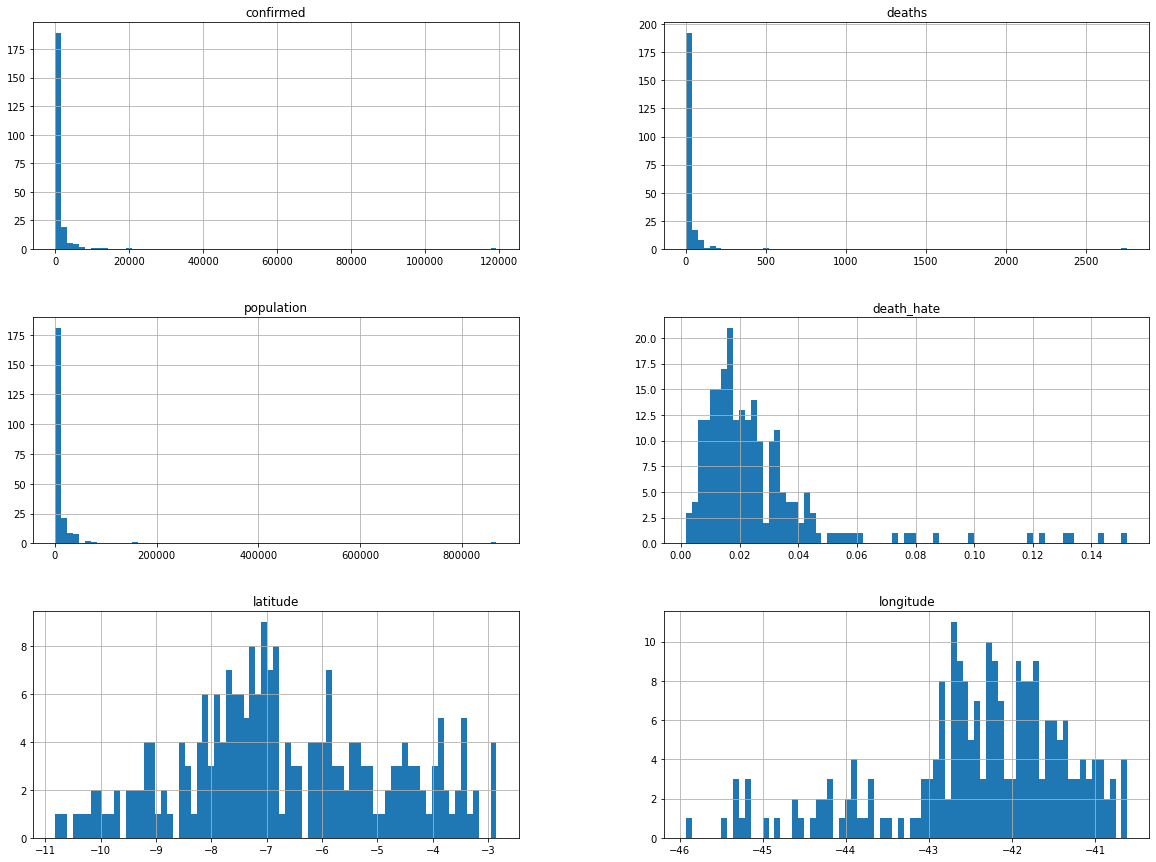

In [16]:
covid_filtered_data.hist(bins=75, figsize=(20,15))

In [17]:
covid_filtered_data.head()


,city,confirmed,deaths,population,death_hate,latitude,longitude
0,Acauã,228,2,7102.0,0.0088,-8.219542,-41.083059
1,Agricolândia,829,10,5131.0,0.0121,-5.796784,-42.660513
2,Água Branca,1702,77,17470.0,0.0452,-5.891392,-42.636115
3,Alagoinha do Piauí,402,13,7665.0,0.0323,-7.009095,-40.939675
4,Alegrete do Piauí,553,9,4918.0,0.0163,-7.244014,-40.860230


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

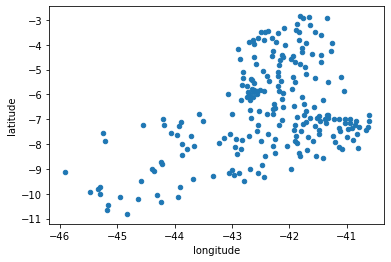

In [18]:
covid_filtered_data.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

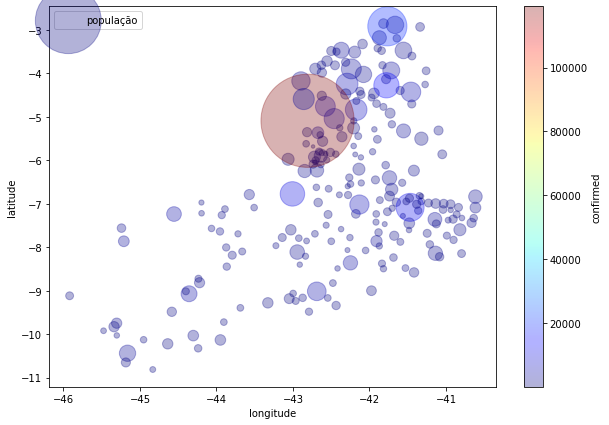

In [19]:
covid_filtered_data.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    alpha=0.3,
    s=covid_filtered_data['population']/100,
    label='população',
    figsize=(10,7),
    c='confirmed',
    cmap=plt.get_cmap('jet'),
    colorbar=True,
    sharex=False
)

In [20]:
matriz_correlation = covid_filtered_data.corr()
matriz_correlation

,confirmed,deaths,population,death_hate,latitude,longitude
confirmed,1.000000,0.996755,0.996275,-0.042708,0.112936,-0.015459
deaths,0.996755,1.000000,0.997791,-0.010849,0.115277,-0.016666
population,0.996275,0.997791,1.000000,-0.022938,0.118598,-0.012695
death_hate,-0.042708,-0.010849,-0.022938,1.000000,-0.166103,-0.169167
latitude,0.112936,0.115277,0.118598,-0.166103,1.000000,0.427193
longitude,-0.015459,-0.016666,-0.012695,-0.169167,0.427193,1.000000


In [21]:
matriz_correlation['death_hate'].sort_values(ascending=False)

death_hate    1.000000
deaths       -0.010849
population   -0.022938
confirmed    -0.042708
latitude     -0.166103
longitude    -0.169167
Name: death_hate, dtype: float64